# Ordinary Least Squares

The Ordinary Least Squares (OLS) is a method to estimate the parameters of a linear regression model. It is a fundamental method in statistics and is used to find the best-fitting straight line through a set of points.

## Linear Regression

Linear regression is a statistical method used to model the relationship between two variables, where one variable is considered the independent variable and the other is the dependent variable. The goal is to find the best-fitting straight line that represents the relationship between these two variables.

$$
Y = X\beta + \epsilon
$$

Where:

- $Y$ is the dependent variable (target).
- $X$ is the independent variable (features).
- $\beta$ is the parameters of the model.
- $\epsilon$ is the error term.

We use the OLS method to estimate the parameters $\beta$ that best fit the data.

We achieve this by minimizing the sum of the squared differences between the observed values and the values predicted by the model.

$$
\min_{\beta} \sum_{i=1}^{n} (y_i - x_i\beta)^2
$$

In other words, we minimize the error term $\epsilon$ and find the best-fitting line that represents the relationship between the two variables.





<Axes: >

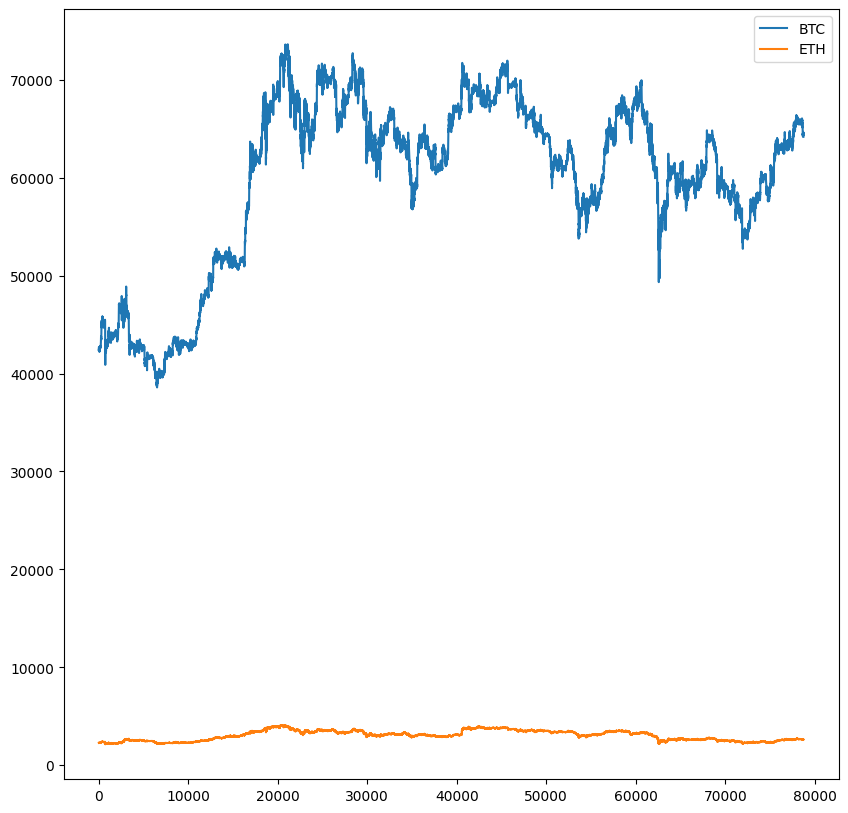

In [1]:
import pandas as pd

btc = pd.read_csv("data/BTC_USDT_5m.csv", sep=";")
eth = pd.read_csv("data/ETH_USDT_5m.csv", sep=";")

data = pd.concat([btc["close"], eth["close"]], axis=1)
data.columns = ["BTC", "ETH"]
data.head()

data.plot(figsize=(10, 10))




## OLS Derivation

 $$
 Y = X\beta + \epsilon 
 $$
 $$
 \epsilon = Y - X\beta  \quad \text{(error term)}
 $$
 $$
 \epsilon^2 = (Y - X\beta)^2 \quad \text{(sum of squared rrors)}
 $$
 $$
 \epsilon^2 = YY - 2YX\beta + (X\beta)^2
 $$
 $$
 \frac{d\epsilon^2}{d\beta} = -2XY + 2X^2\beta
 $$

 Then, we set the derivative to zero to find the minimum:
 $$
 \frac{d\epsilon^2}{d\beta} = 0 = -2XY + 2X^2\beta
 $$
 $$
 \beta = (X^TX)^{-1}X^TY
 $$

 If X is invertible, then we can solve for $\beta$ as follows:
 $$
 \beta = (X^TX)^{-1}X^TY
 $$



Intercept: 14.017860395836578
Slope: 4.998162642555817
Shape of X[:, 1]: (100,)
Shape of y: (100,)
Shape of y_pred: (100,)


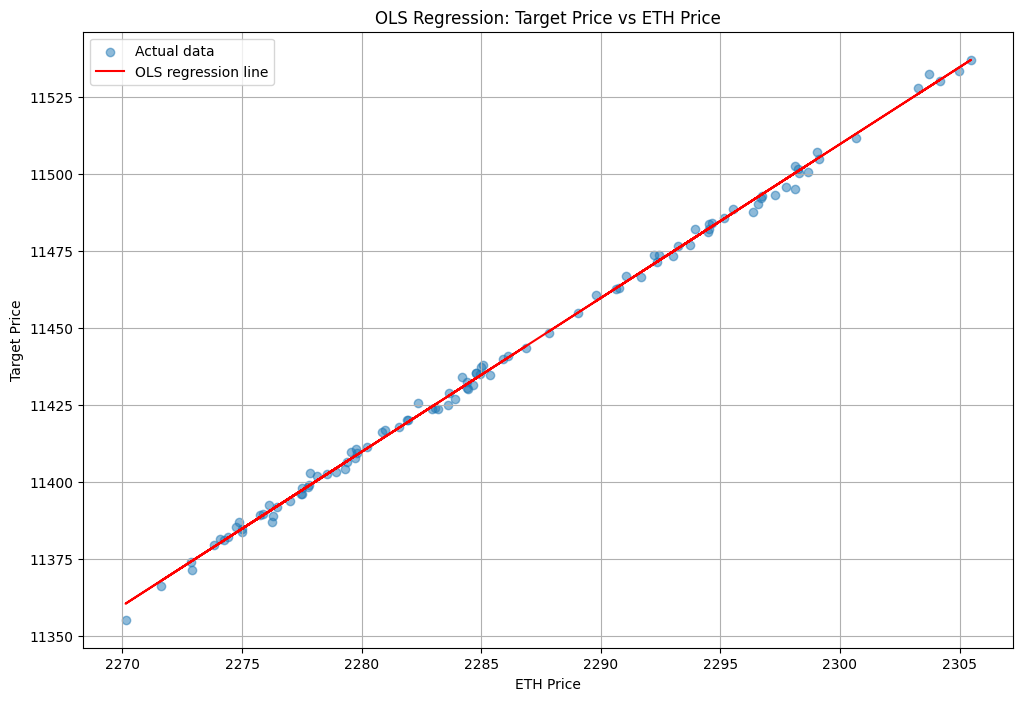

R-squared: 0.9982704704678479


In [7]:
import numpy as np
import matplotlib.pyplot as plt

m = 5
c = 10

# Prepare the data
n = 100
X = data['ETH'].values.reshape(-1, 1)[:n]
y = m * X.flatten() + c + np.random.randn(len(X)) * 2

# Add a column of ones to X for the intercept term
X = np.column_stack((np.ones(X.shape[0]), X))

# Calculate beta using the OLS formula
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Print the results
print(f"Intercept: {beta[0]}")
print(f"Slope: {beta[1]}")

# Calculate the predicted values
y_pred = X @ beta

# Plot the results
plt.figure(figsize=(12, 8))
# Check the shapes of X, y, and y_pred
print(f"Shape of X[:, 1]: {X[:, 1].shape}")
print(f"Shape of y: {y.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

# No need to ensure same length as they should all be (100,) now
X_plot = X[:, 1]
y_plot = y
y_pred_plot = y_pred

plt.scatter(X_plot, y_plot, alpha=0.5, label='Actual data')
plt.plot(X_plot, y_pred_plot, color='red', label='OLS regression line')
plt.xlabel('ETH Price')
plt.ylabel('Target Price')
plt.title('OLS Regression: Target Price vs ETH Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate R-squared
ss_tot = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared}")


As we can see, the R-squared is close to 1, which means that the model is a good fit for the data.

This is obvious since we generated the data ourselves.